## Planteamiento del Proyecto

Derivado de la solicitud del cliente Telecom sobre la posibilidad de desarrollar una herramienta informática que pronostique la tasa de cancelación de clientes, se desarrollará el presente proyecto, el cual busca abordar de manera general los siguientes aspectos:

- Objetivo general: Generar un modelo de machine learning que permita predecir la tasa de cancelación de clientes con el objetivo de hacerles llegar promociones que puedan incrementar la tasa de retención.

- Información proporcionada por el cliente (se analizará en la fase de análisis exploratorio de datos):
    - `contract.csv` — información del contrato;
    - `personal.csv` — datos personales del cliente;
    - `internet.csv` — información sobre los servicios de Internet
    - `phone.csv` — información sobre los servicios telefónicos.
      
Para poder alcanzar el objetivo exitosamente, abordaremos el proyecto dividiéndolo en fases que simplificarán la consecución de objetivos individuales y que finalmente, en conjunto, permitirán obtener los resultados deseados dentro de los parámetros establecidos, los cuales detallamos a continuación:

- **FASE 1:** Comprensión del negocio y descripción del proyecto a realizar.

    - Entenderemos el negocio de nuestro cliente.
    - Realizaremos un FODA enfocado en el servicio solicitado.
    - Explicaremos los alcances del proyecto así como las expectativas realistas de los resultados a obtener.
    - Definiremos los entregables del proyecto.
- **FASE 2:** Análisis exploratorio de datos.

    - Cargaremos la información proporcionada en formato .csv.
    - Identificaremos qué tipo de información contienen y para qué nos podría servir.
    - Facilitaremos la visualización de la información mediante gráficos para la obtención de tendencias.
    - Aplicaremos un análisis estadístico que nos permita obtener "insights" valiosos.

- **FASE 3:** Planteamiento del modelo a entrenar.

    - Analizaremos varios tipos de modelos para el entrenamiento
    - Basados en sus pro's y con's, definiremos que modelo es el mejor para la tarea

- **FASE 4:** Limpieza, complemento y tratamiento de información para entrenamiento del modelo.

    - Aplicaremos procesos de limpieza en caso de ser necesario (nulos, repetidos, mayúsculas/minúsculas, signos especiales, tipos de datos mal definidos)
    - Aplicaremos procesos de ingeniería de características como one-hot-encoding, escalamiento, eliminación de nulos.
    - Separaremos los datasets en sets de entrenamiento y prueba.

- **FASE 5:** Entrenamiento, prueba del modelo y evaluación de resultados.

    - Se entrenará el modelo planteado en la FASE 3, con la información trabajada en la FASE 4.
    - En caso de haber tiempo y no entorpecer en el proceso, se entrenarán otros tipos de modelo para poder comparar los resultados.
    - Se generarán resultados predichos con el modelo entrenado.
    - Se evaluarán los resultados con las métricas AUC-ROC.
      

- **FASE 6:** Conclusiones del proyecto.

# FASE 1

### Modelo de Negocio

Interconnect es un operador de telecomunicaciones que ofrece:

- Servicios principales: Telefonía fija e Internet (DSL/Fibra óptica)
- Servicios complementarios: Seguridad digital, soporte técnico, almacenamiento en la nube y streaming
- Modelo de contratación: Pagos mensuales o contratos anuales (1-2 años)

### Problemática Central

La empresa enfrenta pérdida de clientes (lo abordaremos como "churn") y necesita:

- Identificar proactivamente clientes con alto riesgo de cancelación
- Implementar estrategias de retención efectivas
- Optimizar asignación de recursos en marketing

### FODA BÁSICO

#### Fortalezas

- Datos estructurados de múltiples fuentes (cuatro .csv proporcionados)
- Información de contratos y servicios (contiene la variable objetivo "EndDate")
- Capacidad de implementar acciones de retención (suponiendo una empresa grande)
- Diversificación de servicios (cartera amplia de servicios ofrecidos, empresa grande)

#### Oportunidades

- Reducir costos de adquisición de nuevos clientes (por medio de la retención)
- Mejorar satisfacción y lealtad del cliente (por medio de ofertas por lealtad)
- Desarrollar programas de fidelización personalizados (trabajo de marketing a partir de los resultados del presente proyecto)

#### Debilidades

- Datos dispersos en múltiples archivos (se trabajará en la FASE 2 y 4)
- Posible falta de datos históricos completos (hasta febrero 2021)
- Necesidad de limpieza y estandarización de datos (se trabajará en la FASE 2 y 4)

#### Amenazas

- Cambios en preferencias del mercado (febrero 2021 a la fecha)
- Expectativas irreales sobre precisión del modelo (compartir al cliente los alcances realistas que se pueden lograr con el modelo)

### Alcances del proyecto

#### Alcances INCLUIDOS
1. Integración y limpieza de datos de 4 fuentes diferentes
2. Análisis exploratorio de patrones de cancelación
3. Desarrollo de modelo predictivo de churn
4. Recomendaciones accionables para retención

#### Expectativas Realistas
1. Precisión del modelo: AUC-ROC entre 0.75-0.85 (según criterios de evaluación)
2. Factores identificables: Patrones demográficos, de contrato y uso de servicios
3. Limitaciones: No podrá predecir cancelaciones por factores externos no registrados

#### Entregables del proyecto
1. Dataset unificado y limpio
2. Modelo predictivo entrenado
3. Conclusiones y recomendaciones con base en los resultados obtenidos.

# FASE 2

- Cargaremos los datos y uniremos los 4 .csv por medio de la columna 'customerID'
- Visualizaremos el dataframe generado para identificar tamaño, estructura del nuevo dataframe, tipo de datos, nulos así como el contenido (5 primeras filas)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

contract_df = pd.read_csv('datasets/final_provider/contract.csv')
personal_df = pd.read_csv('datasets/final_provider/personal.csv')
internet_df = pd.read_csv('datasets/final_provider/internet.csv')
phone_df = pd.read_csv('datasets/final_provider/phone.csv')

df = contract_df.merge(personal_df, on='customerID', how='left')
df = df.merge(internet_df, on='customerID', how='left')
df = df.merge(phone_df, on='customerID', how='left')

print("=== DIMENSIONES Y TIPOS DE DATOS UNIFICADOS ===")
print(df.info())
print("\n=== PRIMERAS FILAS DEL DATASET UNIFICADO ===")
print(df.head())

=== DIMENSIONES Y TIPOS DE DATOS UNIFICADOS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 

Se identificaron los siguientes detalles en la información:

- Columna 'TotalCharges' se debe convertir a tipo de dato numérico
  
- Los valores nan en 'TotalCharges' los rellenaremos con cero para evitar tener valores nulos en esta columna ya que puede ser que esta característica nos sirva más adelante en el modelo.
  
- Convertiremos 'BeginDate' y 'EndDate' en tipo fecha. **IMPORTANTE: Al ser esta la característica 'End Date' que utilizaremos como objetivo, tendremos consideraciones adicionales de tratamiento y limpieza para dejarla útil para el modelo**
    - 'EndDate' contiene tanto fechas como el string 'No', por lo que tendremos que considerar un método que identifique fechas y al mismo tiempo considere los strings sin quebrarse.
    - 'No' se entiende como que el cliente aún contaba con el servicio activo, es decir, aún no cancelaba el contrato.
    - Utilizaremos 'coerce' para que en caso de que el dato no pueda considerarse como fecha ('No'), nos de como resultado un valor 'NaT' el cual indica que no es una fecha (not a time).
    - Consideraremos los registros que si sean fechas (cancelaciones) como un (1) y los registros nulos como contratos activos (0)
    - Crearemos la variable objetivo 'Churn' como una columna del dataframe adicional de ceros y unos (contrato finalizado y en curso 1 y 0 respectivamente)
      
- Los valores nulos en los servicios los rellenaremos con 'No service' y 'No phone service' tomando como premisa que si es un valor nulo, no se cuenta con el servicio.

In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(0, inplace=True)

df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')

df['Churn'] = df['EndDate'].notna().astype(int)

internet_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_columns:
    df[col].fillna('No service', inplace=True)

df['MultipleLines'].fillna('No phone service', inplace=True)

print("*** VERIFICACIÓN DE LIMPIEZA ***")
print("\nTipos de datos corregidos:")
print(df[['TotalCharges', 'BeginDate', 'EndDate']].dtypes)
print(f"\nValores únicos en 'InternetService': {df['InternetService'].unique()}")
print(f"\nValores únicos en 'MultipleLines': {df['MultipleLines'].unique()}")
print("\n*** DISTRIBUCIÓN DE CHURN ***")
churn_dist = df['Churn'].value_counts(normalize=True) * 100
print(churn_dist)
print()
print('\n ***Muestra de churn***')
print(df['Churn'].head())

*** VERIFICACIÓN DE LIMPIEZA ***

Tipos de datos corregidos:
TotalCharges           float64
BeginDate       datetime64[ns]
EndDate         datetime64[ns]
dtype: object

Valores únicos en 'InternetService': ['DSL' 'Fiber optic' 'No service']

Valores únicos en 'MultipleLines': ['No phone service' 'No' 'Yes']

*** DISTRIBUCIÓN DE CHURN ***
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


 ***Muestra de churn***
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32


C:\Users\eduar\AppData\Local\Temp\ipykernel_16744\1527638742.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)
C:\Users\eduar\AppData\Local\Temp\ipykernel_16744\1527638742.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
C:\Users\eduar\AppData\Local\Temp\ipykernel_16744\1527638742

<Figure size 1000x600 with 0 Axes>

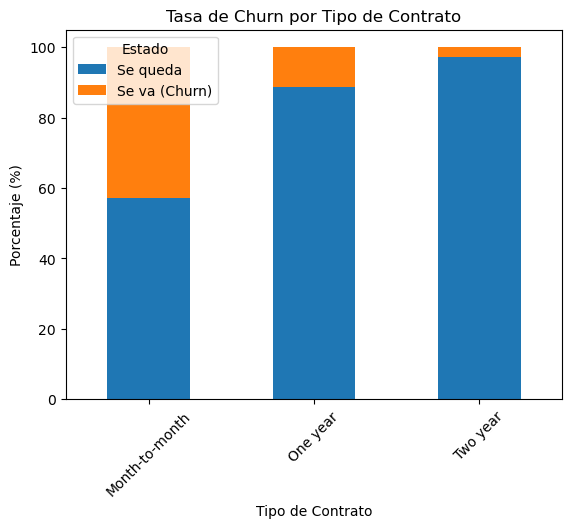

=== CHURN POR TIPO DE CONTRATO ===
Churn                   0          1
Type                                
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


<Figure size 800x500 with 0 Axes>

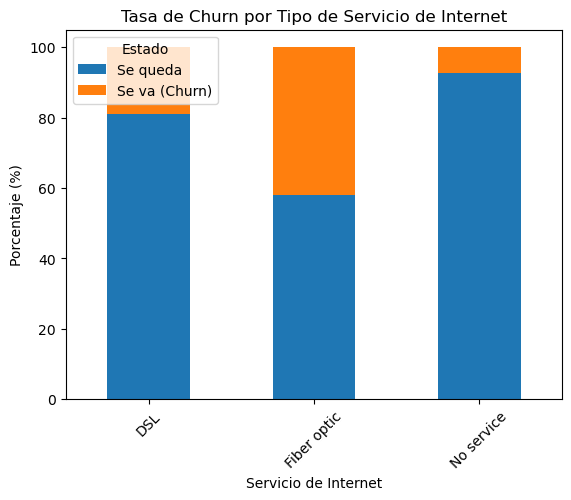

<Figure size 1000x600 with 0 Axes>

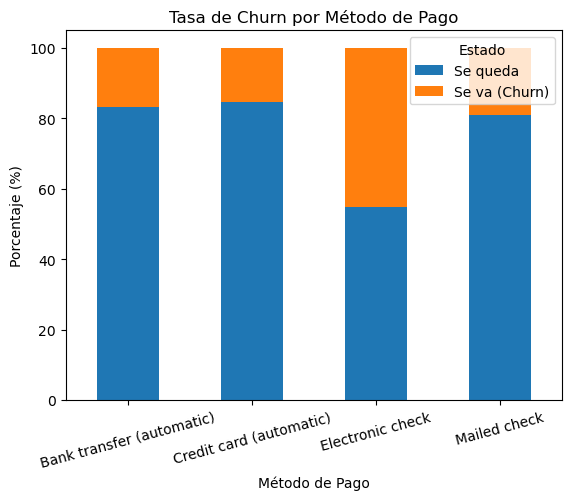

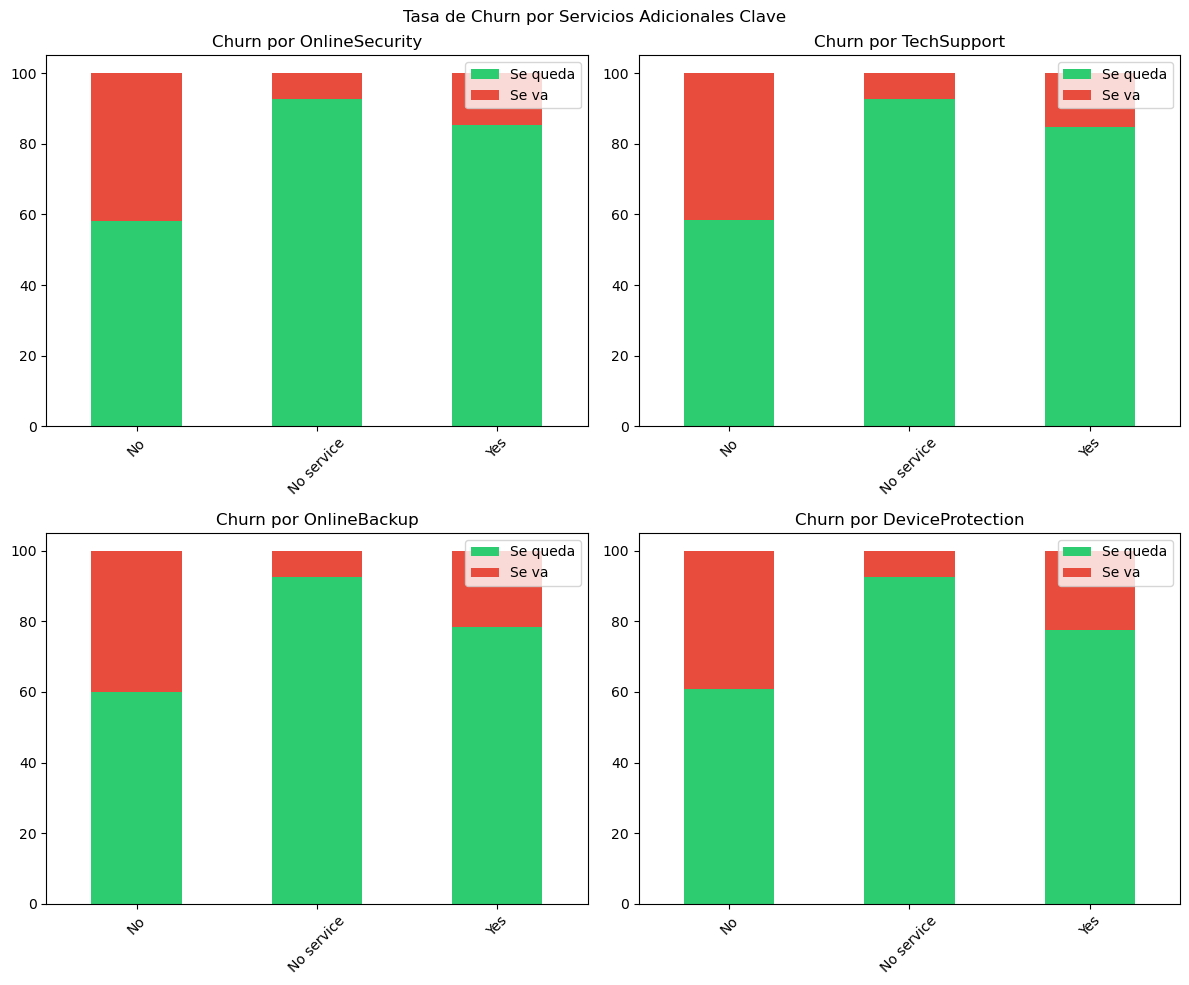

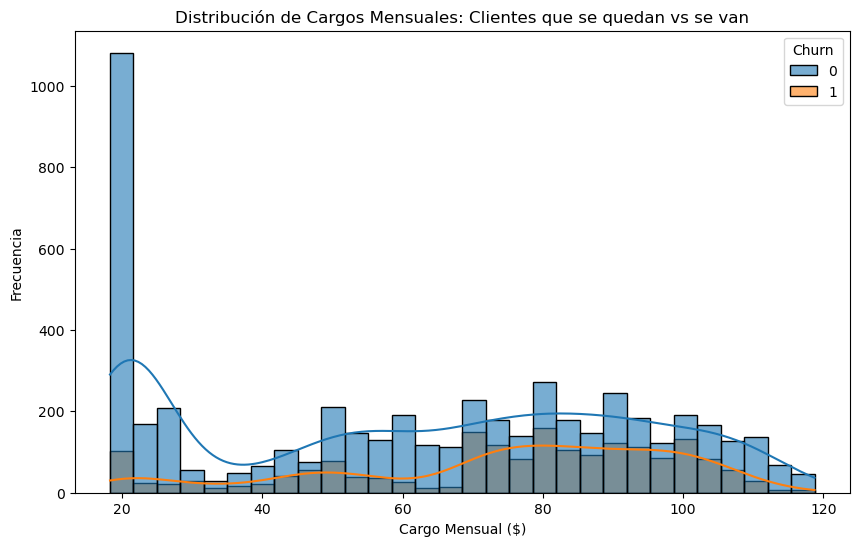

In [37]:
plt.figure(figsize=(10, 6))
# Calculamos los porcentajes para una visualización más clara
contract_churn = pd.crosstab(df['Type'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Tasa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje (%)')
plt.legend(['Se queda', 'Se va (Churn)'], title='Estado')
plt.xticks(rotation=45)
plt.show()

print("=== CHURN POR TIPO DE CONTRATO ===")
print(pd.crosstab(df['Type'], df['Churn'], normalize='index') * 100)

plt.figure(figsize=(8, 5))
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Tasa de Churn por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Porcentaje (%)')
plt.legend(['Se queda', 'Se va (Churn)'], title='Estado')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Tasa de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Porcentaje (%)')
plt.legend(['Se queda', 'Se va (Churn)'], title='Estado')
plt.xticks(rotation=15)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Tasa de Churn por Servicios Adicionales Clave')
services_to_plot = ['OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']
colors = ['#2ecc71', '#e74c3c']  # Verde para No Churn, Rojo para Churn
for i, service in enumerate(services_to_plot):
    row, col = i // 2, i % 2
    service_data = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    service_data.plot(kind='bar', ax=axes[row, col], color=colors, stacked=True)
    axes[row, col].set_title(f'Churn por {service}')
    axes[row, col].set_xlabel('')
    axes[row, col].legend(['Se queda', 'Se va'], loc='upper right')
    axes[row, col].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, alpha=0.6)
plt.title('Distribución de Cargos Mensuales: Clientes que se quedan vs se van')
plt.xlabel('Cargo Mensual ($)')
plt.ylabel('Frecuencia')
plt.show()

## Conclusiones de los gráficos:

- Sobre los tipos de Contrato: El contrato "Month-to-month" tiene una tasa de churn dramáticamente más alta. 

- Sobre los servicios de internet: El servicio de "Fiber optic" tiene mayor churn que "DSL"

- Sobre el método de pago: El método "Electronic check" tiene el mayor churn

- Sobre los Servicios: Los clientes que dicen "No" a OnlineSecurity y TechSupport tienen mucho mayor churn

- Sobre los Cargos Mensuales: Los clientes que se van tienden a tener cargos mensuales más altos

## FASE 3

Dando continuidad y previo al tratamiento de la información del dataframe para que sea útil en el entrenamiento, definiremos los modelos que entrenaremos para la atención de este proyecto.

Entrenamos tanto Regresión Logística como Random Forest porque son dos enfoques complementarios para entender el problema. La Regresión Logística nos ayuda a comprender cómo cada factor individual (como el tipo de servicio o el costo mensual) influye en la probabilidad de que un cliente se vaya, siendo más simple e interpretable. Mientras que Random Forest, al combinar múltiples árboles de decisión, puede capturar relaciones más complejas entre las variables y suele tener mejor precisión predictiva. Al comparar ambos, podemos balancear la necesidad de entender las razones detrás del abandono de clientes con la capacidad de predecirlo con la mayor exactitud posible.

## FASE 4

A continuación, prepararemos el dataset para modelado predictivo realizando una transformación de variables categóricas mediante one-hot encoding. 

- Primero crearemos una copia del dataframe original para preservar los datos fuente
- Identifico las columnas categóricas como género, servicios contratados y método de pago
- Aplicaré get_dummies() con drop_first=True para evitar multicolinealidad.
- Combinamos estas variables codificadas con las columnas numéricas como SeniorCitizen y cargos mensuales junto con la variable objetivo Churn que queremos predecir.
- Verificaremos las dimensiones y estructura del dataset resultante para confirmar que esté listo para entrenar algoritmos de machine learning.

In [38]:
df_model = df.copy()

categorical_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 
                       'PaymentMethod', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Type','SeniorCitizen']

df_encoded = pd.get_dummies(df_model[categorical_columns], drop_first=True)

numerical_columns = [ 'MonthlyCharges', 'TotalCharges']
df_final = pd.concat([df_encoded, df_model[numerical_columns], df_model['Churn']], axis=1)

print("=== DATASET FINAL PARA MODELADO ===")
print(f"Dimensiones: {df_final.shape}")
print(f"Columnas: {df_final.columns.tolist()}")
print(f"\nPrimeras 5 filas:")
print(df_final.head())


=== DATASET FINAL PARA MODELADO ===
Dimensiones: (7043, 29)
Columnas: ['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No service', 'OnlineSecurity_No service', 'OnlineSecurity_Yes', 'OnlineBackup_No service', 'OnlineBackup_Yes', 'DeviceProtection_No service', 'DeviceProtection_Yes', 'TechSupport_No service', 'TechSupport_Yes', 'StreamingTV_No service', 'StreamingTV_Yes', 'StreamingMovies_No service', 'StreamingMovies_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'Type_One year', 'Type_Two year', 'MonthlyCharges', 'TotalCharges', 'Churn']

Primeras 5 filas:
   SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
0              0        False         True           False   
1              0         True        False           False   
2              0         True        Fals

## FASE 5

Comenzaremos ahora con el entrenamiento del modelo implementando el flujo completo de modelado predictivo para clasificación. 

- Comienzo separando el dataset en variables predictoras (X) y la variable objetivo Churn (y)
- Divido los datos en conjuntos de entrenamiento (70%) y prueba (30%) usando estratificación para mantener la proporción de clases.
- Aplico StandardScaler a los datos de Regresión Logística para normalizar las features, mientras que Random Forest, siendo un algoritmo basado en árboles, no requiere este preprocesamiento.
- Entreno ambos modelos y genero predicciones para evaluar su desempeño mediante accuracy y reportes de clasificación que incluyen precision, recall y f1-score, permitiéndome comparar qué algoritmo tiene mejor performance para predecir la rotación de clientes.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== ENTRENAMIENTO DE MODELOS ===")

lr_model = LogisticRegression(random_state=12345)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(random_state=12345, n_estimators=100)
rf_model.fit(X_train, y_train)  # Random Forest no necesita escalado
y_pred_rf = rf_model.predict(X_test)

print("\n--- REGRESIÓN LOGÍSTICA ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\n--- RANDOM FOREST ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


=== ENTRENAMIENTO DE MODELOS ===

--- REGRESIÓN LOGÍSTICA ---
Accuracy: 0.7988641741599621
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113


--- RANDOM FOREST ---
Accuracy: 0.7808802650260294
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



Me interesa conocer que características de las utilizadas para el entrenamiento del modelo son las que más afectan la predicción de mi modelo. Para ello, implementará un paso adicional que me permitirá ver a mi y a mi cliente, las variables que son más representativas para el presente ejercicio. Lo anterior podría llegar a detonar un mejor seguimiento de estos parámetros y llegar al diseño de estrategias específicas para controlarlos y promocionarlos. 

- Creo un dataframe que combina los nombres de las features con sus valores de importancia obtenidos del modelo entrenado, ordenándolos de mayor a menor relevancia.
- Se visualizan las 10 características más importantes usando un gráfico de barras horizontales con seaborn, lo que me permite identificar rápidamente los factores clave que influyen en el churn, como posiblemente el tipo de servicio, cargos mensuales o métodos de pago, proporcionando insights accionables para el negocio sobre dónde enfocar las estrategias de retención.

=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===


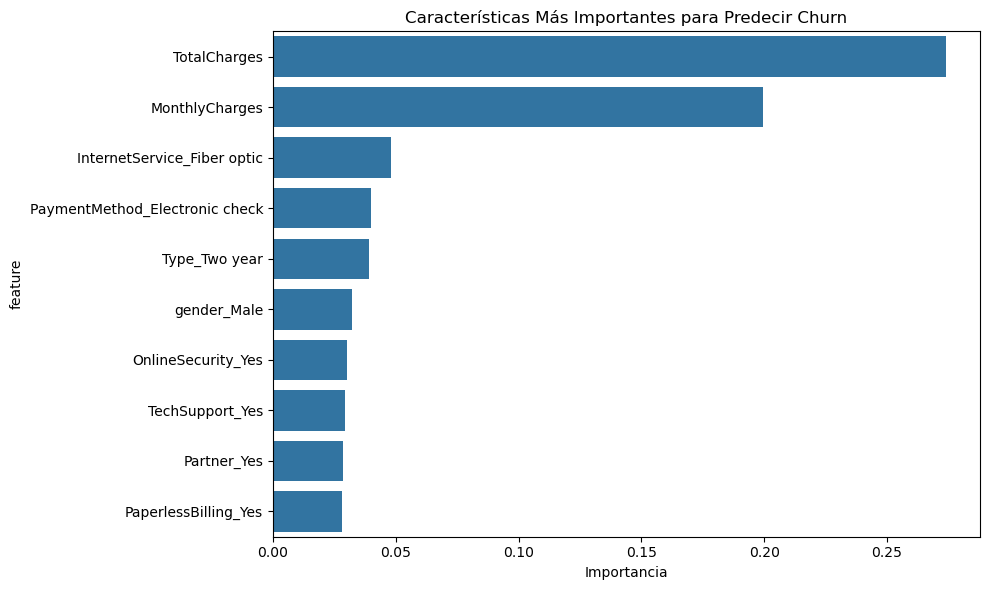

                           feature  importance
27                    TotalCharges    0.274174
26                  MonthlyCharges    0.199400
8      InternetService_Fiber optic    0.048093
6   PaymentMethod_Electronic check    0.040095
25                   Type_Two year    0.038984
1                      gender_Male    0.032186
11              OnlineSecurity_Yes    0.030108
17                 TechSupport_Yes    0.029265
2                      Partner_Yes    0.028497
4             PaperlessBilling_Yes    0.028297


In [40]:

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Mostrar las 10 características más importantes
print("=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===")
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Características Más Importantes para Predecir Churn')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print(feature_importance.head(10))




Procederemos a evaluar los resultados obtenidos por los modelos entrenados mediante la aplicación de las métricas AUC-ROC:

- Generamos las probabilidades predichas de ambos modelos
- Calculamos el área bajo la curva ROC que me indica qué tan bien puede distinguir cada algoritmo entre clientes que se mantienen y aquellos que renuncian al servicio.
- Al visualizar las curvas ROC, donde la Regresión Logística y Random Forest se comparan contra un clasificador aleatorio, puedo determinar qué modelo tiene mejor balance entre sensibilidad y especificidad

*** NOTA: el AUC más cercano a 1 el indicador de mejor performance para predecir correctamente el churn de clientes. ***

=== AUC-ROC SCORES ===
Regresión Logística: 0.8347
Random Forest: 0.8138


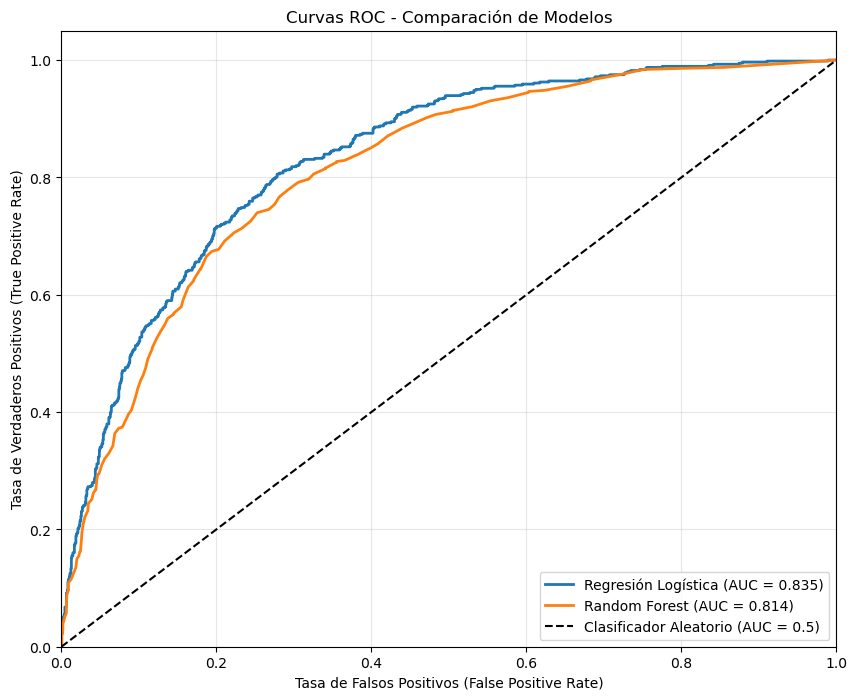

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular probabilidades de predicción (no solo las clases predichas)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para Regresión Logística
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]        # Probabilidades para Random Forest

# Calcular AUC-ROC para ambos modelos
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("=== AUC-ROC SCORES ===")
print(f"Regresión Logística: {auc_lr:.4f}")
print(f"Random Forest: {auc_rf:.4f}")

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))

# Calcular curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Plotear curvas
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Línea de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio (AUC = 0.5)')

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


## FASE 6

### CONCLUSIONES PRELIMINARES:

    1. Enfocarse en clientes con contrato 'Month-to-month' - ofrecer incentivos para conversion a contratos anuales
    2. Revisar de la estrategia de precios para Fibra Óptica - posiblemente muy costosa para el valor percibido
    3. Incentivar métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) con pequeños descuentos
    4. Promocionar agresivamente servicios de Security y TechSupport - bundle con descuento para retención
    5. Ejecutar campaña para clientes que pagan con 'Electronic check' ofreciendo alternativas más convenientes
    6. Segmentar clientes por cargo mensual: clientes >$70 necesitan atención especial y revisión de valor percibido"


In [42]:
print("\n=== PERFIL DEL CLIENTE DE ALTO RIESGO DE CHURN ===")

# Características que más contribuyen al churn según nuestro análisis
high_risk_profile = {
    "Tipo de Contrato": "Month-to-month",
    "Servicio de Internet": "Fiber optic", 
    "Método de Pago": "Electronic check",
    "Servicios Adicionales": "Sin OnlineSecurity, Sin TechSupport",
    "Facturación": "Paperless",
    "Cargo Mensual": "Alto (> $70)"
}

for key, value in high_risk_profile.items():
    print(f"• {key}: {value}")

print("\n=== RECOMENDACIONES PARA EL EQUIPO DE MARKETING ===")
recommendations = [
    "1. ENFOQUE PRIORITARIO en clientes con contrato 'Month-to-month' - ofrecer incentivos para conversion a contratos anuales",
    "2. REVISIÓN de la estrategia de precios para Fibra Óptica - posiblemente muy costosa para el valor percibido",
    "3. INCENTIVAR métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) con pequeños descuentos",
    "4. PROMOCIONAR agresivamente servicios de Security y TechSupport - bundle con descuento para retención",
    "5. CAMPAÑA PROACTIVA para clientes que pagan con 'Electronic check' ofreciendo alternativas más convenientes",
    "6. SEGMENTACIÓN por cargo mensual: clientes >$70 necesitan atención especial y revisión de valor percibido"
]

for rec in recommendations:
    print(rec)


=== PERFIL DEL CLIENTE DE ALTO RIESGO DE CHURN ===
• Tipo de Contrato: Month-to-month
• Servicio de Internet: Fiber optic
• Método de Pago: Electronic check
• Servicios Adicionales: Sin OnlineSecurity, Sin TechSupport
• Facturación: Paperless
• Cargo Mensual: Alto (> $70)

=== RECOMENDACIONES PARA EL EQUIPO DE MARKETING ===
1. ENFOQUE PRIORITARIO en clientes con contrato 'Month-to-month' - ofrecer incentivos para conversion a contratos anuales
2. REVISIÓN de la estrategia de precios para Fibra Óptica - posiblemente muy costosa para el valor percibido
3. INCENTIVAR métodos de pago automáticos (transferencia bancaria, tarjeta de crédito) con pequeños descuentos
4. PROMOCIONAR agresivamente servicios de Security y TechSupport - bundle con descuento para retención
5. CAMPAÑA PROACTIVA para clientes que pagan con 'Electronic check' ofreciendo alternativas más convenientes
6. SEGMENTACIÓN por cargo mensual: clientes >$70 necesitan atención especial y revisión de valor percibido
